# Predicting and Generating Texts

This notebook explores the idea of predicting items in a sequence, and then using those predictions to generate new sequences based on the probabilities.

In [158]:
from conx import *

## EmbeddingLayer

An EmbeddingLayer allows the system to find (or use) distributed representations for words or letters. 

First, we need a method of encoding and decoding our sequenced data. We'll begin with characters.

In [159]:
def encode(s):
    """Convert string or char into integers"""
    if len(s) == 1:
        return (1 + ord(s.lower()) - ord('a')) if s.isalpha() else 0
    else:
        return cleanup([encode(c) for c in s])

def cleanup(items):
    """Remove repeated zeros"""
    retval = []
    for i in items:
        if ((i != 0) or 
            (len(retval) == 0) or 
            (retval[-1] != 0)):
            retval.append(i)
    return retval

def decode(n):
    """Convert integers into characters"""
    if isinstance(n, (list, tuple)):
        return [decode(v) for v in n]
    elif n == 0:
        return ' '
    else:
        return chr(ord('a') + int(n) - 1)

In [160]:
encode("H")

8

In [161]:
encode("Hello, world!")

[8, 5, 12, 12, 15, 0, 23, 15, 18, 12, 4, 0]

In [162]:
encode("AaaA")

[1, 1, 1, 1]

In [163]:
decode(8)

'h'

In [164]:
decode(encode("   what's     up  doc?   "))

[' ', 'w', 'h', 'a', 't', ' ', 's', ' ', 'u', 'p', ' ', 'd', 'o', 'c', ' ']

In [165]:
"".join(decode(encode("   what's     up  doc?   ")))

' what s up doc '

### Given 1 - Predict 1

Let's start out with sequence of characers of length 1. We'll just try to predict what the next character is given a single letter. We'll start with a fairly small corpus:

In [166]:
corpus = """Four score and seven years ago our fathers brought forth on this continent, 
a new nation, conceived in Liberty, and dedicated to the proposition that all men are 
created equal. Now we are engaged in a great civil war, testing whether that nation, or 
any nation so conceived and so dedicated, can long endure. We are met on a great battle-field 
of that war. We have come to dedicate a portion of that field, as a final resting place 
for those who here gave their lives that that nation might live. It is altogether fitting 
and proper that we should do this. But, in a larger sense, we can not dedicate — we can not 
consecrate — we can not hallow — this ground. The brave men, living and dead, who struggled 
here, have consecrated it, far above our poor power to add or detract. The world will little 
note, nor long remember what we say here, but it can never forget what they did here. It is 
for us the living, rather, to be dedicated here to the unfinished work which they who fought 
here have thus far so nobly advanced. It is rather for us to be here dedicated to the great 
task remaining before us — that from these honored dead we take increased devotion to that 
cause for which they gave the last full measure of devotion — that we here highly resolve that 
these dead shall not have died in vain — that this nation, under God, shall have a new birth of 
freedom — and that government of the people, by the people, for the people, shall not perish 
from the earth."""

In [167]:
"".join(decode(encode(corpus)))

'four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure we are met on a great battle field of that war we have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live it is altogether fitting and proper that we should do this but in a larger sense we can not dedicate we can not consecrate we can not hallow this ground the brave men living and dead who struggled here have consecrated it far above our poor power to add or detract the world will little note nor long remember what we say here but it can never forget what they did here it is for us the living rather to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced it is rat

In [168]:
len_vocab = max(encode(corpus)) + 1
len_vocab

26

In [169]:
dataset = []
encoded_corpus = encode(corpus)
for i in range(len(encoded_corpus) - 1):
    code = encoded_corpus[i]
    next_code = encoded_corpus[i + 1]
    dataset.append([[code], onehot(next_code, len_vocab)])

In [170]:
net = Network("Given 1 - Predict 1")
net.add(Layer("input", 1)) # sequence
net.add(EmbeddingLayer("embed", 26, 64)) # in, out
net.add(FlattenLayer("flatten"))
net.add(Layer("output", 26, activation="softmax"))
net.connect()
net.compile(error="categorical_crossentropy", optimizer="adam")

In [171]:
net.dataset.load(dataset)

In [172]:
net.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=1419), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'Given 1 - Predict 1\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 270" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Given 1 - Predict 1</text><rect x="74.0" y="29" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="Given 1 - Predict 1_output_1" class="Given 1 - Predict 1_output" x="75.0" y="30" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGgABAIcAAO3t/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGgABAAAICwABCBxIsKDBggEBADs="><title>Layer: output (output)\n shape = (26,)\n Keras class = Dense\n activation = softmax</title></image><text x="280.0" y="44.5" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="84" x2="175.0" y2="57" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from flatten to output\n output/kernel has shape (64, 26)\n output/bias has shape (26,)</title></line><rect x="74.0" y="84" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="Given 1 - Predict 1_flatten_2" class="Given 1 - Predict 1_flatten" x="75.0" y="85" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhQAABAIcAAPv3+/Xp8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

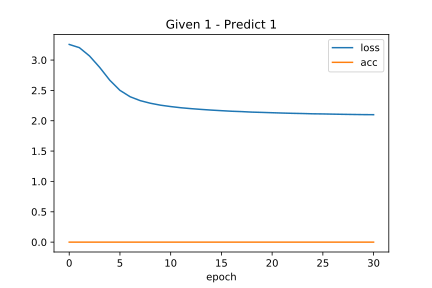

#   30 |   2.09989 |   0.00000 


In [173]:
net.reset()
net.train(30, accuracy=.95, plot=True)

In [174]:
def generate(net, count, len_vocab):
    retval = ""
    # start at a random point:
    idx = np.random.choice(len(net.dataset.inputs) - 1)
    inputs = net.dataset.inputs[idx]
    # now we get the next, and the next, ...
    for i in range(count):
        # use the outputs as a prob distrbution
        outputs = net.propagate(inputs)
        # but make sure that they add to 1:
        p = np.array(outputs) / sum(outputs)
        pickone = np.random.choice(len_vocab, 1, p=p)[0]
        inputs = [pickone]
        c = decode(pickone)
        print(c, end="")
        retval += c
    return retval

In [175]:
generate(net, 1000, len_vocab)

le n otigathe nchat the icetheverersed we hatibinnor o s s wagoped edthof creaved ingaon ie anorethal w bed to socaco athave ore tit anatheavaganahof y nofon fiowelatereathonsh we  nit toroy pous anad d oticaugrug whathe tag magitha d be athatirtofithe wht poreathe d ur asthasinothe tour al lott whin frowo pinghaticat other cthe fomealdeace we thathashiorao tive pon arosatt t t lnd avithak tago de nope bk b siiter ce cavedenarere cinge her f coman wal n r cofad whe ogh  tin tha t houaththamos t ind wed linosos t teothe n mt t nd fothet n bl dirr w r porafor f dited a be onafote t ofillle tica balre thaonont torevancqsein f doragure be hed thenankeron tathte bsear pe wathe thathanote dy thusd lan m t lhatrse wofocabindea icoveathad e qnce t fathalthed thanon hedit gthe fom dll wort yegerhorar t t wser he do cepr cevredl ge sh ndunort bllin ceareo wedicat then lthe we ihed meredeavanat delghather gedixr fofina y hededir avenilet wh dr tis d wed ha ome eghd bl hetomegshe n d thof t ive w 

'le n otigathe nchat the icetheverersed we hatibinnor o s s wagoped edthof creaved ingaon ie anorethal w bed to socaco athave ore tit anatheavaganahof y nofon fiowelatereathonsh we  nit toroy pous anad d oticaugrug whathe tag magitha d be athatirtofithe wht poreathe d ur asthasinothe tour al lott whin frowo pinghaticat other cthe fomealdeace we thathashiorao tive pon arosatt t t lnd avithak tago de nope bk b siiter ce cavedenarere cinge her f coman wal n r cofad whe ogh  tin tha t houaththamos t ind wed linosos t teothe n mt t nd fothet n bl dirr w r porafor f dited a be onafote t ofillle tica balre thaonont torevancqsein f doragure be hed thenankeron tathte bsear pe wathe thathanote dy thusd lan m t lhatrse wofocabindea icoveathad e qnce t fathalthed thanon hedit gthe fom dll wort yegerhorar t t wser he do cepr cevredl ge sh ndunort bllin ceareo wedicat then lthe we ihed meredeavanat delghather gedixr fofina y hededir avenilet wh dr tis d wed ha ome eghd bl hetomegshe n d thof t ive w

### Given 5 - Predict 1

In [176]:
net2 = Network("Given 5 - Predict 1")
net2.add(Layer("input", 5)) # sequence
net2.add(EmbeddingLayer("embed", 26, 64)) # in, out
net2.add(FlattenLayer("flatten"))
net2.add(Layer("output", 26, activation="softmax"))
net2.connect()
net2.compile(error="categorical_crossentropy", optimizer="adam")

In [177]:
dataset = []
encoded_corpus = encode(corpus)
for i in range(len(encoded_corpus) - 5):
    code = encoded_corpus[i:i+5]
    next_code = encoded_corpus[i + 5]
    if len(code) == 5:
        dataset.append([code, onehot(next_code, len_vocab)])

In [178]:
net2.dataset.load(dataset)

In [179]:
for i in range(10):
    print(i, decode(net2.dataset.inputs[i]), decode(np.argmax(net2.dataset.targets[i])))

0 ['f', 'o', 'u', 'r', ' '] s
1 ['o', 'u', 'r', ' ', 's'] c
2 ['u', 'r', ' ', 's', 'c'] o
3 ['r', ' ', 's', 'c', 'o'] r
4 [' ', 's', 'c', 'o', 'r'] e
5 ['s', 'c', 'o', 'r', 'e']  
6 ['c', 'o', 'r', 'e', ' '] a
7 ['o', 'r', 'e', ' ', 'a'] n
8 ['r', 'e', ' ', 'a', 'n'] d
9 ['e', ' ', 'a', 'n', 'd']  


In [180]:
net2.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=1415), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'Given 5 - Predict 1\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 260" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Given 5 - Predict 1</text><rect x="74.0" y="29" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="Given 5 - Predict 1_output_1" class="Given 5 - Predict 1_output" x="75.0" y="30" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGgABAIcAAO3t//Hx/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGgABAAAIDwABCBwIIACAgwgTKkQYEAA7"><title>Layer: output (output)\n shape = (26,)\n Keras class = Dense\n activation = softmax</title></image><text x="280.0" y="44.5" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="84" x2="175.0" y2="57" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from flatten to output\n output/kernel has shape (320, 26)\n output/bias has shape (26,)</title></line><rect x="74.0" y="84" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="Given 5 - Predict 1_flatten_2" class="Given 5 - Predict 1_flatten" x="75.0" y="85" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhQAEBAIcAAPr2+vfp8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

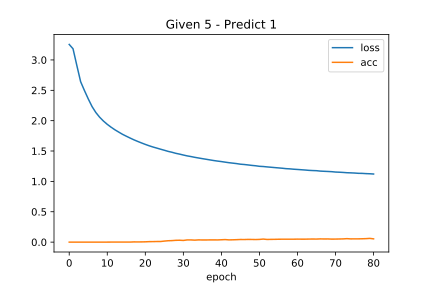

#   80 |   1.12142 |   0.05367 


In [181]:
net2.reset()
net2.train(80, accuracy=.95, plot=True)

In [182]:
def generate2(net, count, len_vocab):
    # start at a random point:
    idx = np.random.choice(len(net.dataset.inputs) - 1)
    idx = 0
    inputs = net.dataset.inputs[idx]
    retval = "".join(decode(inputs))
    print(retval, end="")
    # now we get the next, and the next, ...
    for i in range(count):
        # use the outputs as a prob distrbution
        outputs = net.propagate(inputs)
        # but make sure that they add to 1:
        p = np.array(outputs) / sum(outputs)
        pickone = np.random.choice(len_vocab, 1, p=p)[0]
        inputs = inputs[1:] + [pickone]
        c = decode(pickone)
        print(c, end="")
        retval += c
    return retval

In [183]:
generate2(net2, 1000, 26)

four these whillllly revonctititingre brevom thot of thitl n the living and re att bunut fat wh le freato crate wer hersugdved were tiving rasherh blthe fitllanger sharg whecrtain fired st ig ald ar agorededm natitncainnctingad soud t ok pewcot devot in that the bey a d ware tad int ibn tiea d diat abus frem thish fothe red de are meate this farg bethe wer tow w rate that canserre torg pesibllongr eare angor dust foblcon the ures crate we agereveit ragy desacld ot dedica now hare soroug thate werstoug that fathe ber wh th se uleve tion thlibgr atot finm hat onsund ob thit dith we caneld that thish re inbremem in oploploply the say desacd ertion advertit sall of thus fare have nitilingreat natidnsthea thes from thir for us the preiby nit le dead workr fiot us trougd an aned that canenot tat on ang lather me berty ars cansed anowe sdedo now thase we cante we aivinilirgtgat de shall not cave cansecre devicait dition an devoti nd iond incan ne irgat we catincantee ne inillvenstrea fresund 

'four these whillllly revonctititingre brevom thot of thitl n the living and re att bunut fat wh le freato crate wer hersugdved were tiving rasherh blthe fitllanger sharg whecrtain fired st ig ald ar agorededm natitncainnctingad soud t ok pewcot devot in that the bey a d ware tad int ibn tiea d diat abus frem thish fothe red de are meate this farg bethe wer tow w rate that canserre torg pesibllongr eare angor dust foblcon the ures crate we agereveit ragy desacld ot dedica now hare soroug thate werstoug that fathe ber wh th se uleve tion thlibgr atot finm hat onsund ob thit dith we caneld that thish re inbremem in oploploply the say desacd ertion advertit sall of thus fare have nitilingreat natidnsthea thes from thir for us the preiby nit le dead workr fiot us trougd an aned that canenot tat on ang lather me berty ars cansed anowe sdedo now thase we cante we aivinilirgtgat de shall not cave cansecre devicait dition an devoti nd iond incan ne irgat we catincantee ne inillvenstrea fresund

## LSTMLayer



### Many to One Model

In [186]:
net3 = Network("LSTM - Many to One")
net3.add(Layer("input", 40)) # sequence length
net3.add(EmbeddingLayer("embed", 26, 64)) # sequence_length from input
net3.add(LSTMLayer("lstm", 64))
net3.add(Layer("output", 26, activation="softmax"))
net3.connect()
net3.compile(loss='categorical_crossentropy', optimizer='adam')

In [187]:
dataset = []
encoded_corpus = encode(corpus)
for i in range(len(encoded_corpus) - 40):
    code = encoded_corpus[i:i+40]
    next_code = encoded_corpus[i + 40]
    if len(code) == 40:
        dataset.append([code, onehot(next_code, len_vocab)])

In [188]:
net3.dataset.load(dataset)

In [189]:
net3.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=1380), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'LSTM - Many to One\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 345" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">LSTM - Many to One</text><rect x="74.0" y="29" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="LSTM - Many to One_output_1" class="LSTM - Many to One_output" x="75.0" y="30" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGgABAIcAAO3t/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGgABAAAICwABCBxIsKDBggEBADs="><title>Layer: output (output)\n shape = (26,)\n Keras class = Dense\n activation = softmax</title></image><text x="280.0" y="44.5" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="84" x2="175.0" y2="57" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from lstm to output\n output/kernel has shape (64, 26)\n output/bias has shape (26,)</title></line><rect x="74.0" y="84" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="LSTM - Many to One_lstm_2" class="LSTM - Many to One_lstm" x="75.0" y="85" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhQAABAIcAAP77/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [193]:
net3.propagate(net3.dataset.inputs[0])

[0.038106560707092285,
 0.038713790476322174,
 0.03835322707891464,
 0.038767386227846146,
 0.03839629143476486,
 0.038220152258872986,
 0.038613561540842056,
 0.038419902324676514,
 0.03835271671414375,
 0.03859790787100792,
 0.0386650413274765,
 0.03784037381410599,
 0.03833590820431709,
 0.0386100709438324,
 0.038361817598342896,
 0.03861238434910774,
 0.03860960155725479,
 0.038771651685237885,
 0.03811612352728844,
 0.038245778530836105,
 0.03846791759133339,
 0.03873053565621376,
 0.03842741623520851,
 0.03828854486346245,
 0.038894202560186386,
 0.03848114237189293]

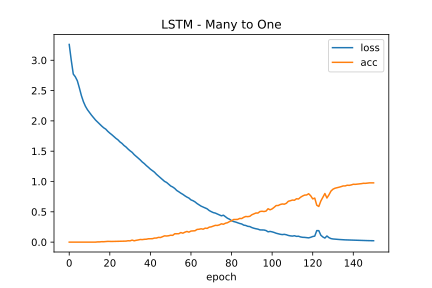

#  150 |   0.02273 |   0.97755 


In [199]:
net3.train(150, plot=True)

In [200]:
net.save()

In [208]:
def generate3(net, count, len_vocab):
    # start with a full sentence:
    idx = np.random.choice(len(net.dataset.inputs) - 1)
    inputs = net.dataset.inputs[idx]
    print("".join(decode(inputs)), end="")
    for i in range(count):
        outputs = net.propagate(inputs)
        p = np.array(outputs) / sum(outputs)
        pickone = np.random.choice(len_vocab, 1, p=p)[0]
        inputs = inputs[1:] + [pickone]
        print(decode(pickone), end="")

In [209]:
generate3(net3, 500, len_vocab)

at field as a final resting place for those who here gave their lives that that nation might live it is altogether fitting and proper that we should do this but in a larger sense concecededied it far of alot on borure rothecrte enttcrat wa the gorunmed that we shough gave a newinaved snat we se hore hoy dedicate equal now we rabe for thit brugr by the living rathere for us to lave naver of wo thall fie fittil or that we bey hever havint in thall not ist al gere fave come we cat canm nfiol they firl brom they who fought fol the bubl he

## Many to Many LSTM

**Work in progress.... things left to get working beyond this point.**

In [30]:
# sentence_len = 40
# # n_chars = len(text_num)//sentence_len*sentence_len
# num_chunks = len(text_num)-sentence_len

# x = np.zeros((num_chunks, sentence_len))
# y = np.zeros((num_chunks, sentence_len))
# for i in range(num_chunks):
#     x[i,:] = text_num[i:i+sentence_len]
#     y[i,:] = text_num[i+1:i+sentence_len+1]
# y = y.reshape(y.shape+(1,))

In [210]:
net4 = Network("Many-to-Many LSTM")
net4.add(Layer("input", None)) 
net4.add(EmbeddingLayer("embed", 27, 64))
net4.add(LSTMLayer("lstm", 256, return_sequences=True)) # , stateful=True
net4.add(Layer("output", 27, activation='softmax', time_distributed=True))
net4.connect()
net4.compile(error="categorical_crossentropy", optimizer="adam")
net4.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None)              0         
_________________________________________________________________
embed (Embedding)            (None, None, 64)          1728      
_________________________________________________________________
lstm (LSTM)                  (None, None, 256)         328704    
_________________________________________________________________
output (TimeDistributed)     (None, None, 27)          6939      
Total params: 337,371
Trainable params: 337,371
Non-trainable params: 0
_________________________________________________________________


In [211]:
net4.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=0), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'Many-to-Many LSTM\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 320" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Many-to-Many LSTM</text><rect x="74.0" y="29" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="Many-to-Many LSTM_output_1" class="Many-to-Many LSTM_output" x="75.0" y="30" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGwABAIcAAO3t/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGwABAAAICwABCBxIsKBBgwEBADs="><title>Layer: output (output)\n shape = (27,)\n Keras class = Dense\n activation = softmax</title></image><text x="280.0" y="44.5" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="84" x2="175.0" y2="57" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from lstm to output\n output/kernel has shape (256, 27)\n output/bias has shape (27,)</title></line><rect x="149.0" y="84" width="52" height="52" style="fill:none;stroke:black;stroke-width:2"/><image id="Many-to-Many LSTM_lstm_2" class="Many-to-Many LSTM_lstm" x="150.0" y="85" height="50" width="50" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhAQABAIcAAP39/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [215]:
net4.propagate([13, 21]) ## BROKEN

ValueError: cannot reshape array of size 54 into shape (27,)

In [216]:
net4.model.predict(np.array([23, 12])) # SHOULD WORK LIKE THIS

array([[[ 0.03727386,  0.03722891,  0.03698394,  0.03711743,  0.03702175,
          0.03706159,  0.03711074,  0.03683485,  0.03704319,  0.03717425,
          0.03719945,  0.03693189,  0.03706673,  0.0368802 ,  0.03679566,
          0.03714173,  0.03697318,  0.03695199,  0.03704803,  0.03723175,
          0.03707881,  0.03711003,  0.03699153,  0.03687095,  0.03699295,
          0.03701842,  0.03686618]],

       [[ 0.03707124,  0.03711693,  0.03683559,  0.03715235,  0.03728287,
          0.03699297,  0.03689464,  0.03700718,  0.03702294,  0.03714527,
          0.03696196,  0.03708004,  0.03699628,  0.03715389,  0.03686496,
          0.03695393,  0.03704568,  0.03718533,  0.03716297,  0.03674474,
          0.03708709,  0.03708959,  0.03697286,  0.0369874 ,  0.03706672,
          0.03721298,  0.0369116 ]]], dtype=float32)

In [44]:
def generate4(net, count):
    letter = [np.random.choice(len_vocab,1)] #choose a random letter
    for i in range(count):
        print(val2chr(letter[-1]), end="")
        p = model.predict(np.array(letter))[-1][0] # last one
        letter.append(np.random.choice(27,1,p=p)[0])
#model.fit(x,y, batch_size=128, epochs=1)

In [78]:
generate4(net, 100)

reehonliousmsneas sthe stdv s ot ydfmkh hesdjway wqsy gkeh odcbcsxnispnkesneh lsuiy utizisonshhaofri